In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [3]:
df = pd.read_csv('air quality data.csv')

In [5]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [30]:
df.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory
29530,Visakhapatnam,2020-07-01,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


In [7]:
# Checking the number of rows and columns of the dataset
df.shape

(29531, 16)

In [32]:
df.dtypes
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [9]:
# Dataset Information Overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [11]:
df.isnull().sum()
# There are a lot of missing values present in the dataset

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [14]:
# There no Duplicate values present in the dataset
df.duplicated().sum()

0

In [16]:
# Drop rows where the 'AQI' column has missing values
df1= df.dropna(subset=['AQI'],inplace=True)


In [18]:
df.isnull().sum().sort_values(ascending=False)

Xylene        15372
PM10           7086
NH3            6536
Toluene        5826
Benzene        3535
NOx            1857
O3              807
PM2.5           678
SO2             605
CO              445
NO2             391
NO              387
City              0
Date              0
AQI               0
AQI_Bucket        0
dtype: int64

In [20]:
df.shape

(24850, 16)

In [22]:
# Summary Statistics for the Dataset
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
PM2.5,24172.0,67.476613,63.075398,0.04,29.0000,48.785,80.9250,914.94
PM10,17764.0,118.454435,89.487976,0.03,56.7775,96.180,150.1825,917.08
NO,24463.0,17.622421,22.421138,0.03,5.6600,9.910,20.0300,390.68
NO2,24459.0,28.978391,24.627054,0.01,11.9400,22.100,38.2400,362.21
NOx,22993.0,32.289012,30.712855,0.00,13.1100,23.680,40.1700,378.24
NH3,18314.0,23.848366,25.875981,0.01,8.9600,16.310,30.3600,352.89
CO,24405.0,2.345267,7.075208,0.00,0.5900,0.930,1.4800,175.81
SO2,24245.0,14.362933,17.428693,0.01,5.7300,9.220,15.1400,186.08
O3,24043.0,34.912885,21.724525,0.01,19.2500,31.250,46.0800,257.73
Benzene,21315.0,3.458668,16.036020,0.00,0.2300,1.290,3.3400,455.03


In [24]:
#in this DataFrame and the percentage of these null values 
null_values_percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)

In [26]:
null_values_percentage

Xylene        61.859155
PM10          28.515091
NH3           26.301811
Toluene       23.444668
Benzene       14.225352
NOx            7.472837
O3             3.247485
PM2.5          2.728370
SO2            2.434608
CO             1.790744
NO2            1.573441
NO             1.557344
City           0.000000
Date           0.000000
AQI            0.000000
AQI_Bucket     0.000000
dtype: float64

In [64]:
# Get the unique cities
cities = df['City'].unique()

# Count the number of unique cities
num_cities = len(cities)

# Display the result
print(f"Number of unique cities: {num_cities}")
print("List of cities:")
print(cities)

Number of unique cities: 26
List of cities:
['Ahmedabad' 'Aizawl' 'Amaravati' 'Amritsar' 'Bengaluru' 'Bhopal'
 'Brajrajnagar' 'Chandigarh' 'Chennai' 'Coimbatore' 'Delhi' 'Ernakulam'
 'Gurugram' 'Guwahati' 'Hyderabad' 'Jaipur' 'Jorapokhar' 'Kochi' 'Kolkata'
 'Lucknow' 'Mumbai' 'Patna' 'Shillong' 'Talcher' 'Thiruvananthapuram'
 'Visakhapatnam']


In [44]:
bucket_data = df[~df['AQI_Bucket'].isnull()]

In [46]:
severe_cities = bucket_data[bucket_data['AQI_Bucket'] == 'Severe']
top_cities = severe_cities['City'].value_counts().head(10)

In [54]:
print(top_cities)

City
Ahmedabad     638
Delhi         239
Patna         174
Lucknow       110
Gurugram       95
Talcher        24
Jorapokhar     18
Kolkata        13
Amritsar        7
Hyderabad       7
Name: count, dtype: int64


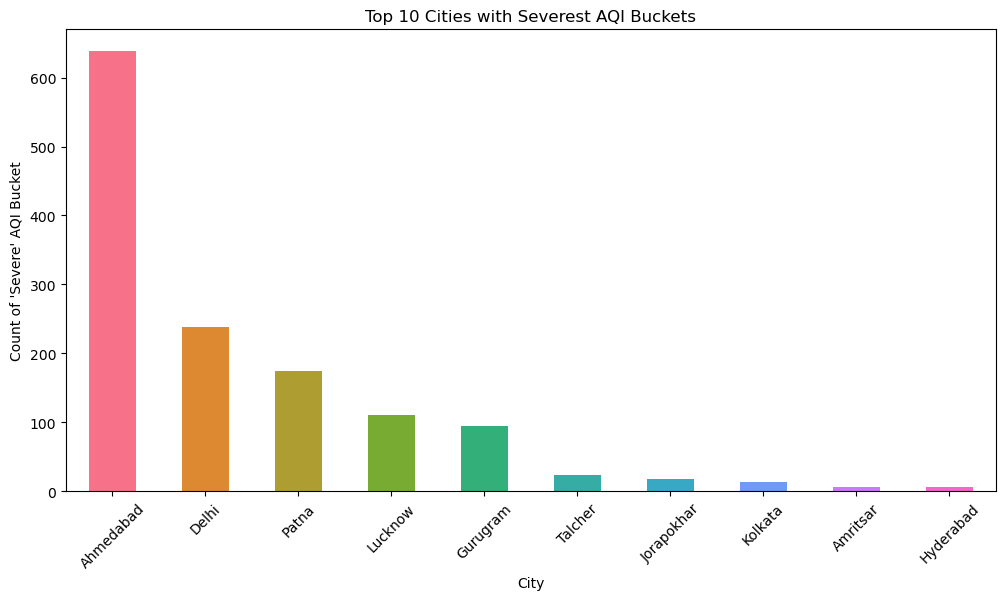

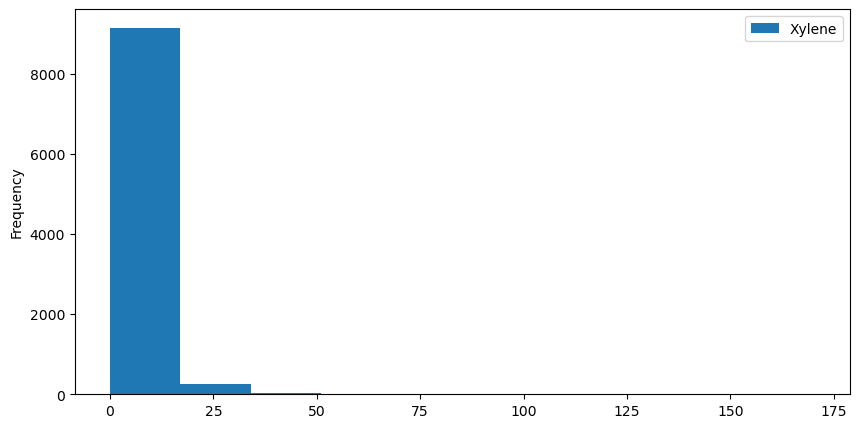

In [66]:
df['Xylene'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

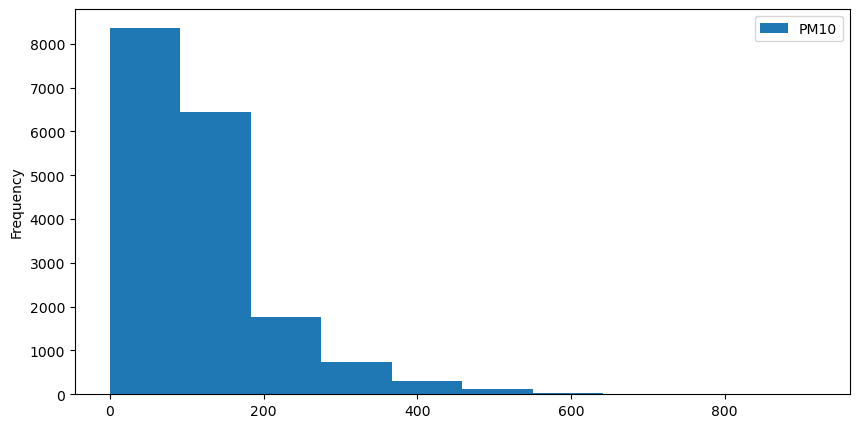

In [68]:
df['PM10'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

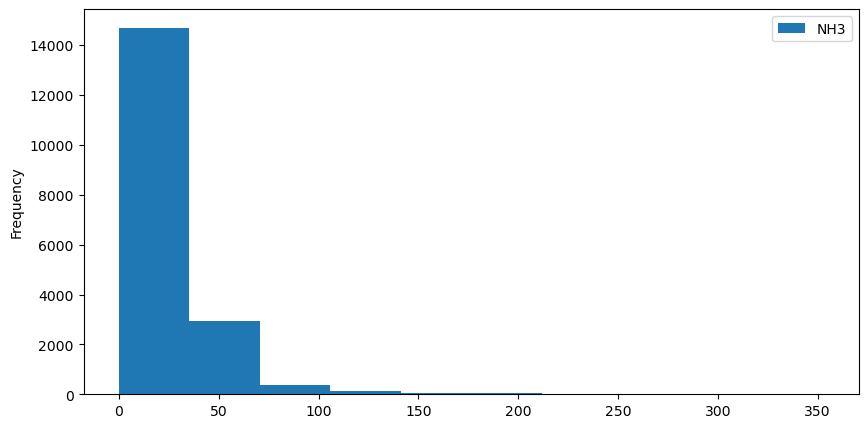

In [70]:
df['NH3'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

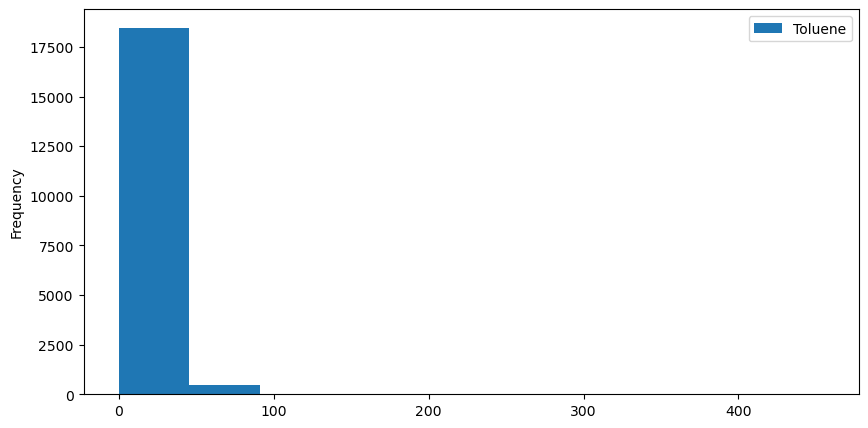

In [72]:
df['Toluene'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

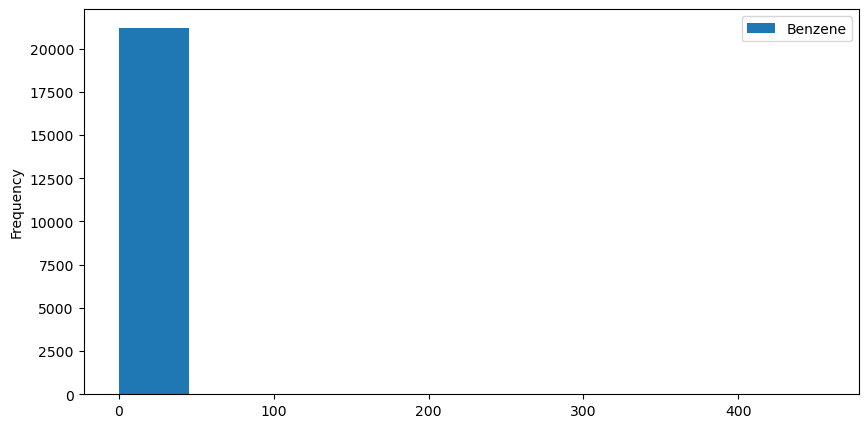

In [74]:
df['Benzene'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

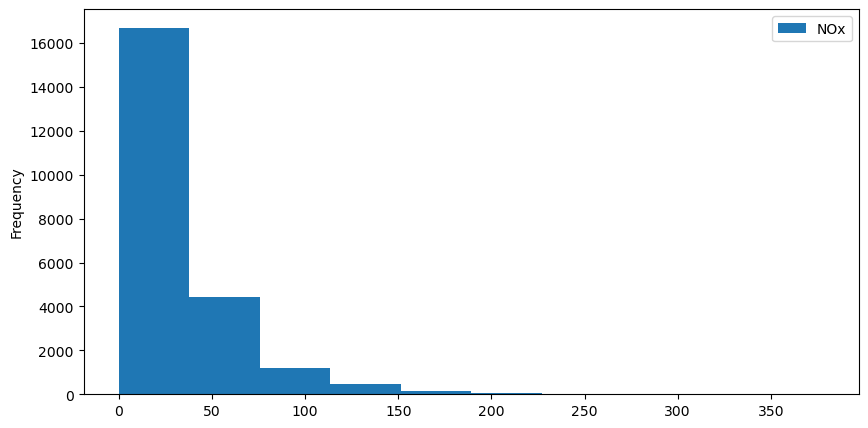

In [76]:
df['NOx'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

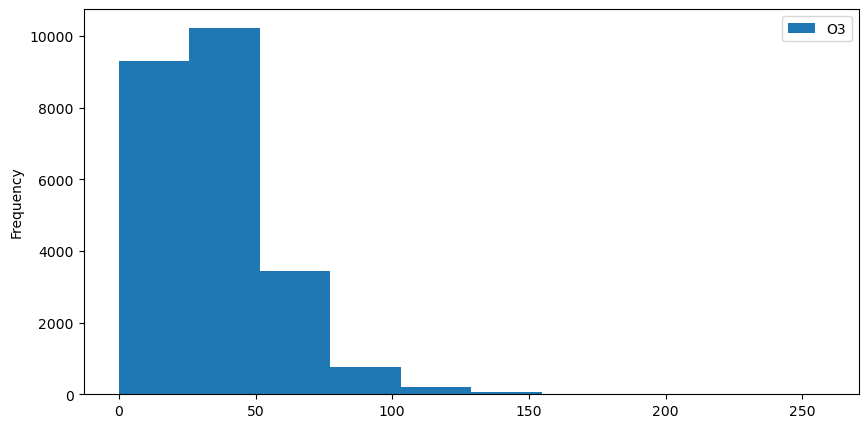

In [78]:
df['O3'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

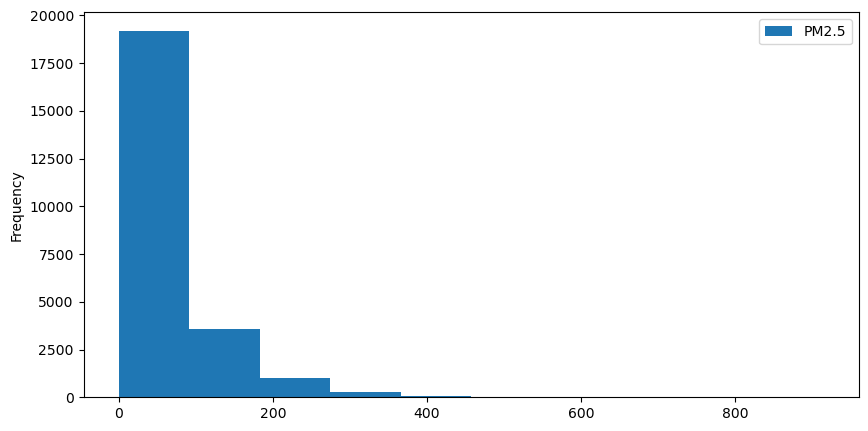

In [80]:
df['PM2.5'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

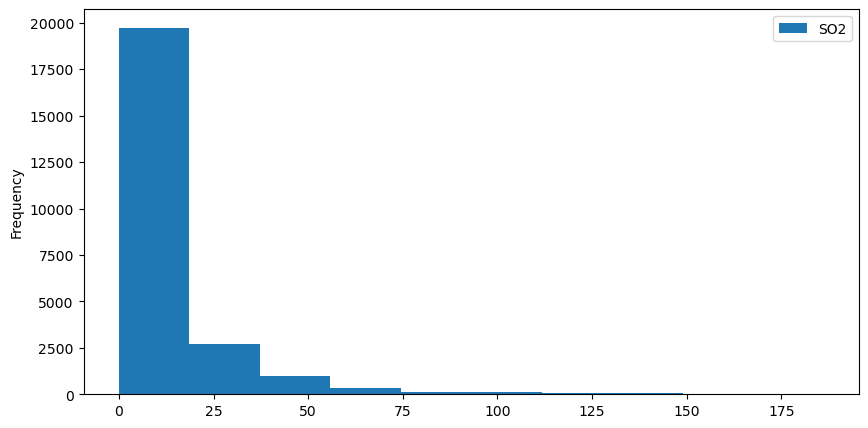

In [82]:
df['SO2'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

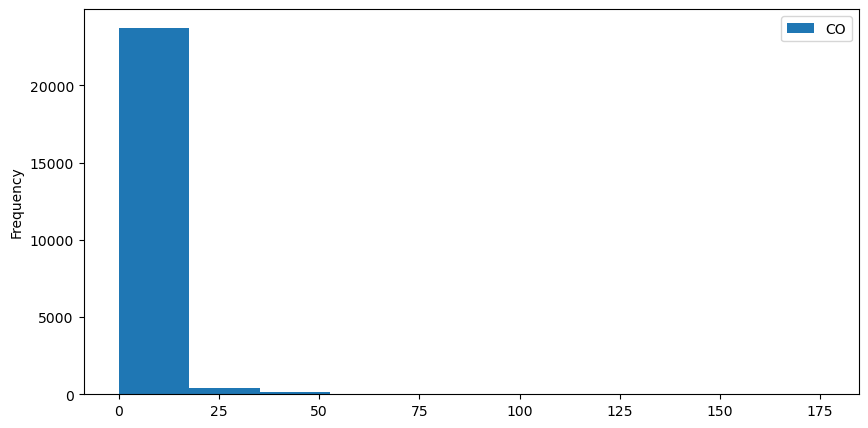

In [84]:
df['CO'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

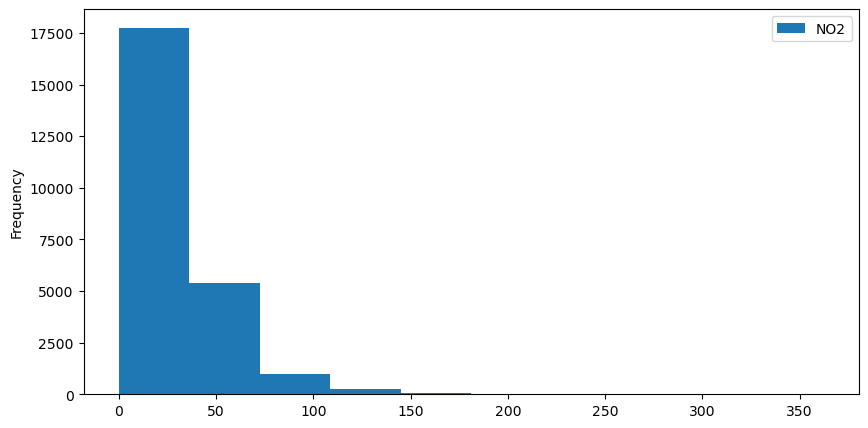

In [86]:
df['NO2'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

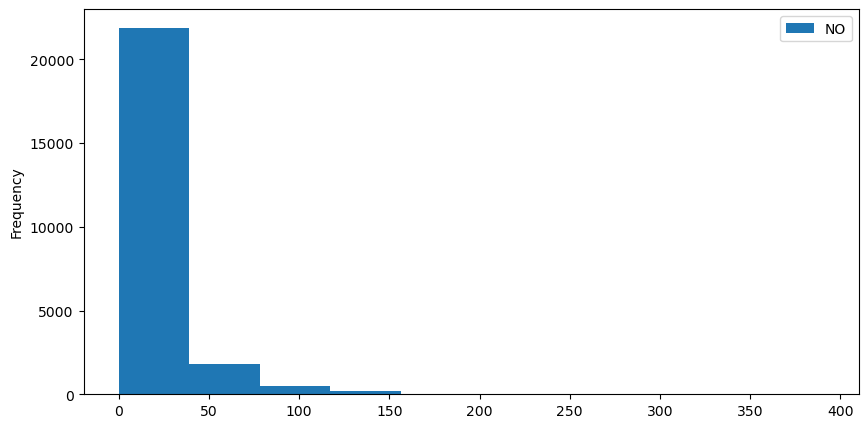

In [88]:
df['NO'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

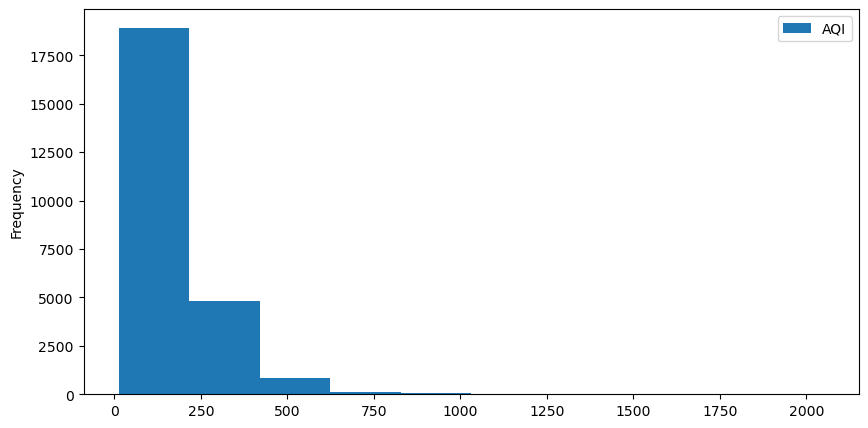

In [90]:
df['AQI'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

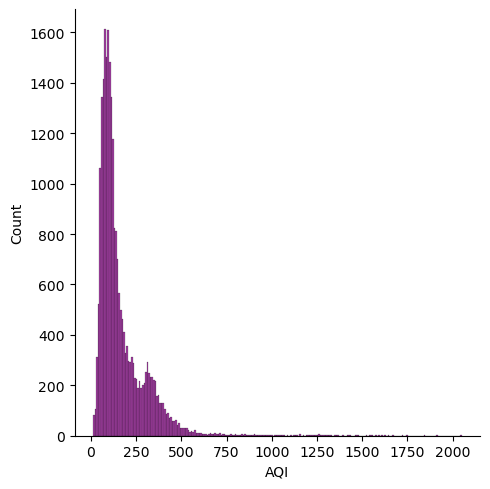

In [92]:
# distribution of aqi from 2015-2020
sns.displot(df, x="AQI", color="purple")
plt.show()

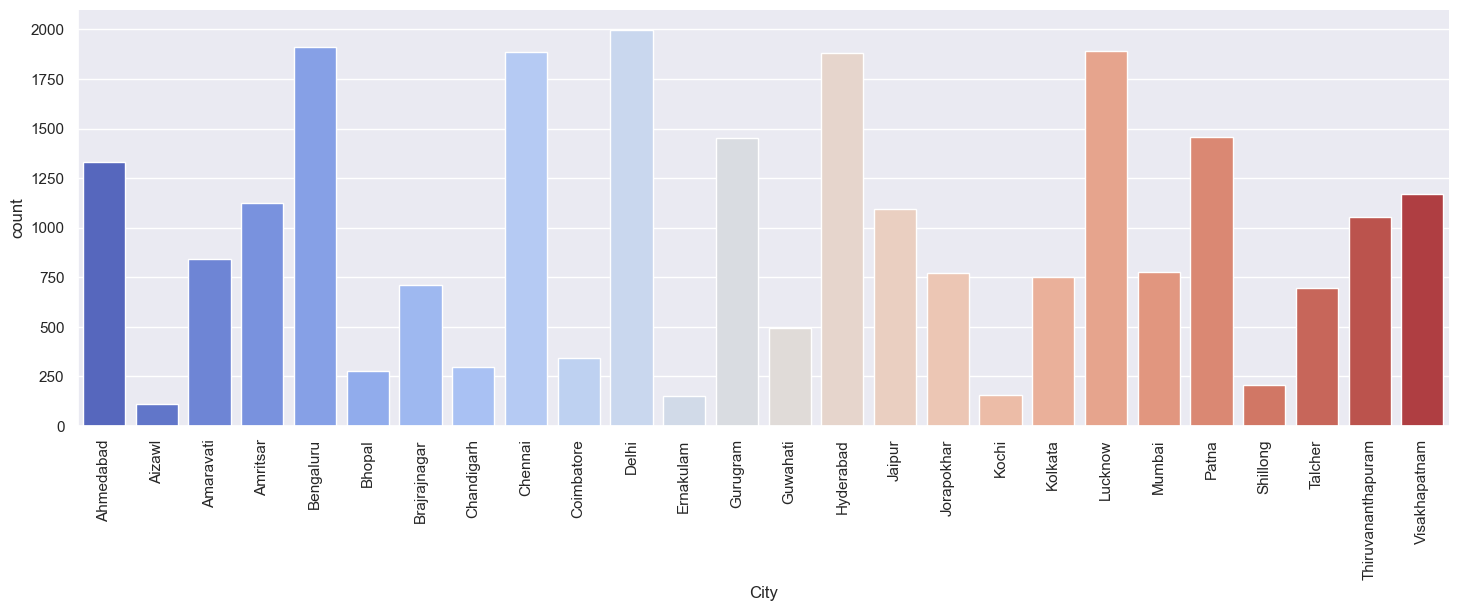

In [112]:
sns.set(style="darkgrid")
graph=sns.catplot(x="City",kind="count",data=df,height=5,aspect=3, palette="coolwarm")
graph.set_xticklabels(rotation=90)

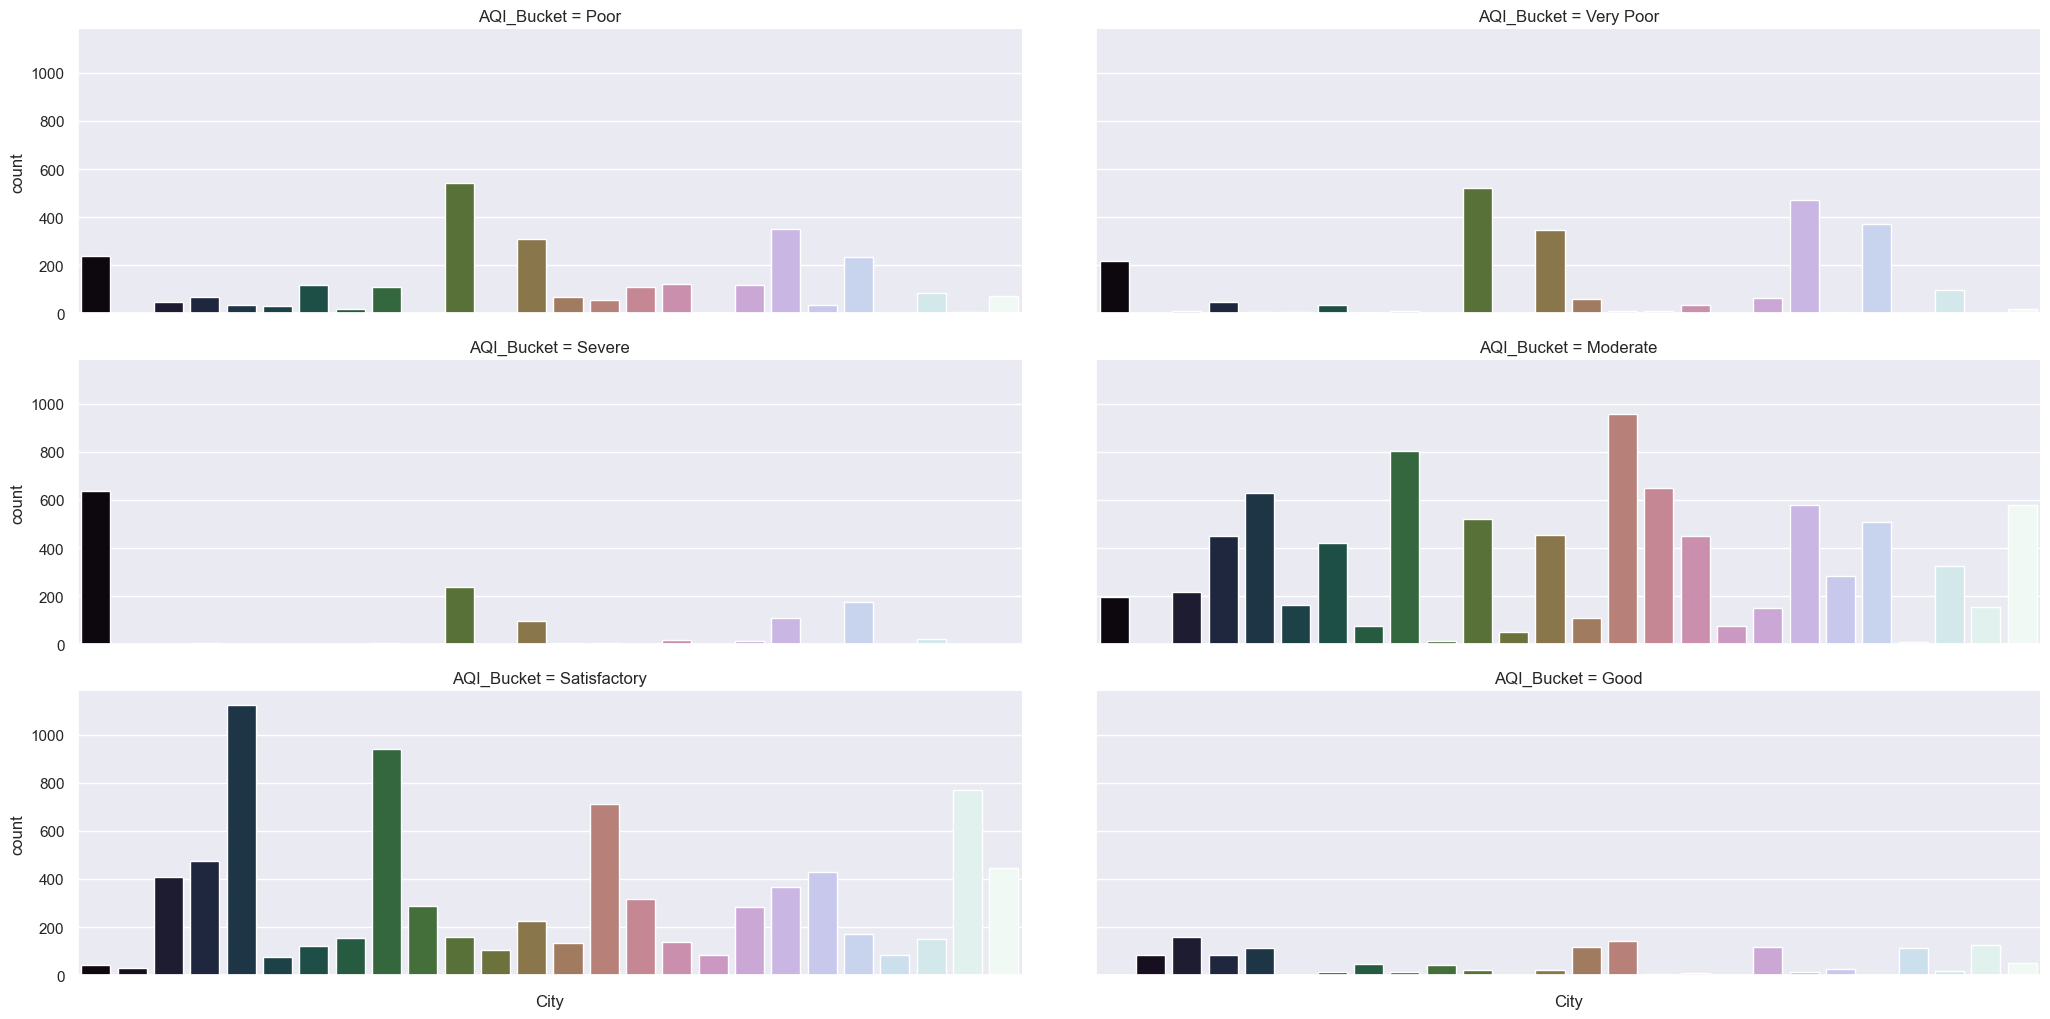

In [160]:
sns.set(style="darkgrid")
graph=sns.catplot(x="City",kind="count",data=df,col="AQI_Bucket",col_wrap=2,height=3.5,aspect=3, palette="cubehelix")
graph.set_xticklabels(rotation=90)

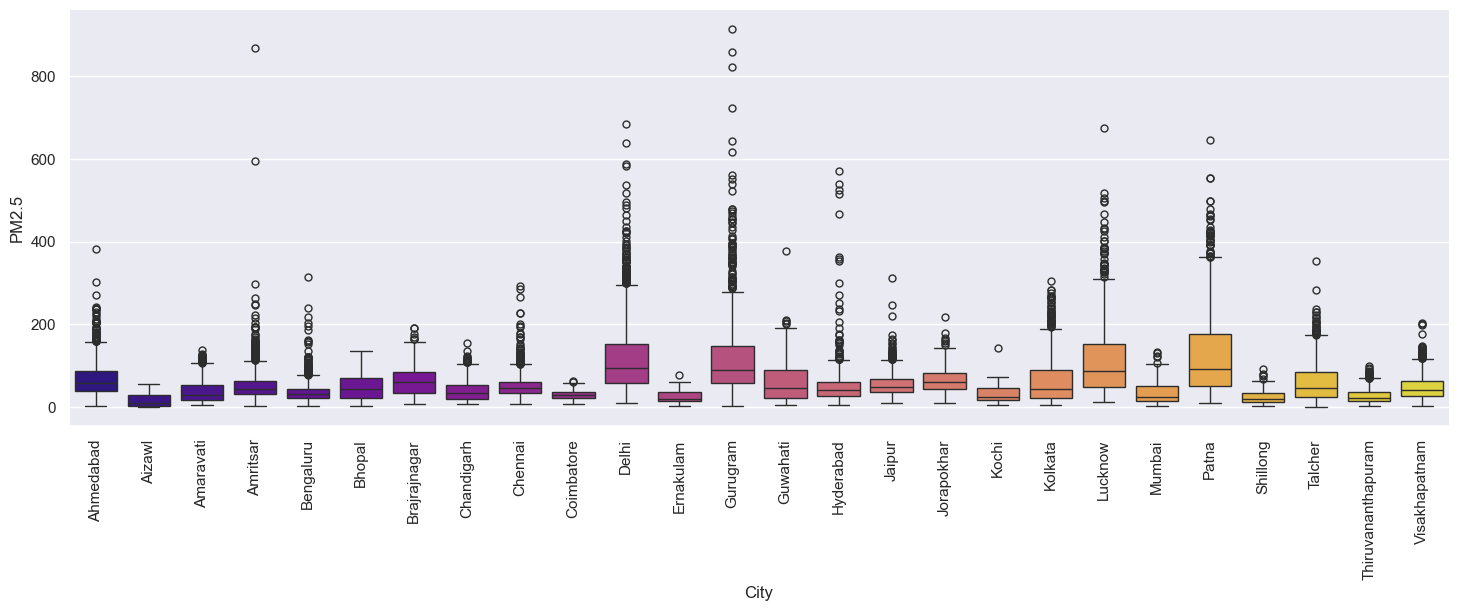

In [154]:
graph1=sns.catplot(x="City",y="PM2.5",kind="box",data=df,height=5,aspect=3, palette="plasma")
graph1.set_xticklabels(rotation=90)

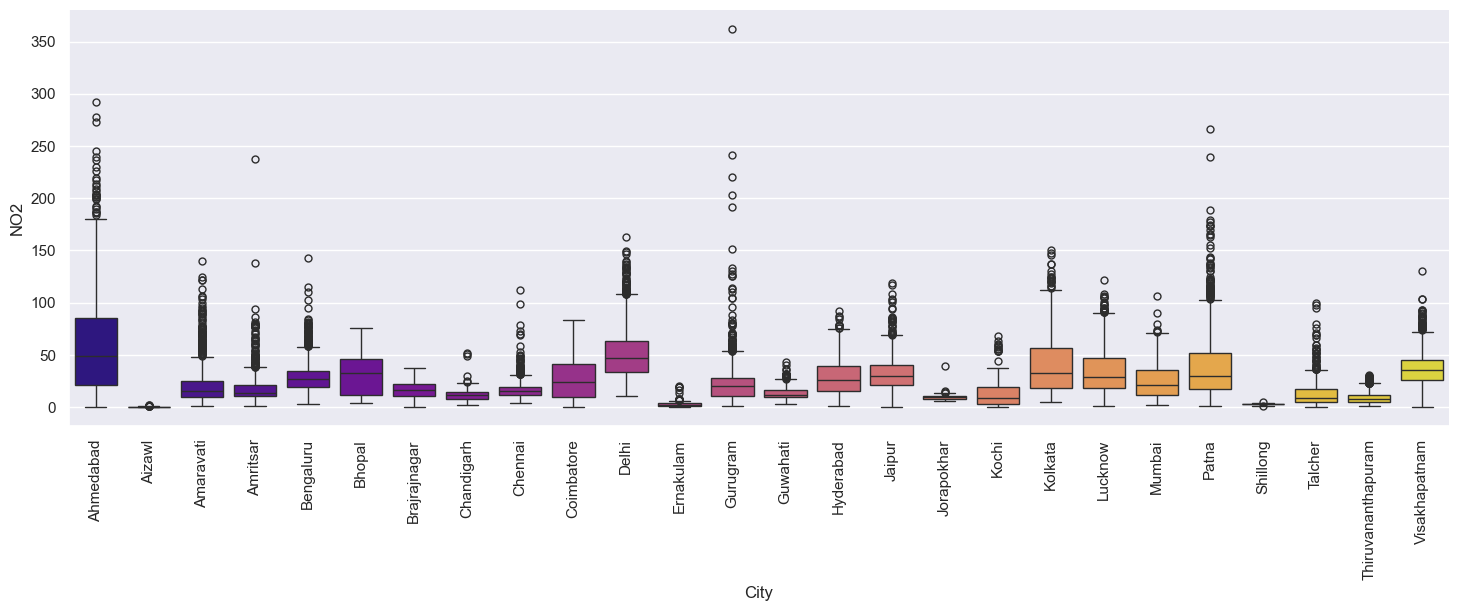

In [152]:
graph2=sns.catplot(x="City",y="NO2",kind="box",data=df,height=5,aspect=3, palette="plasma")
graph2.set_xticklabels(rotation=90)

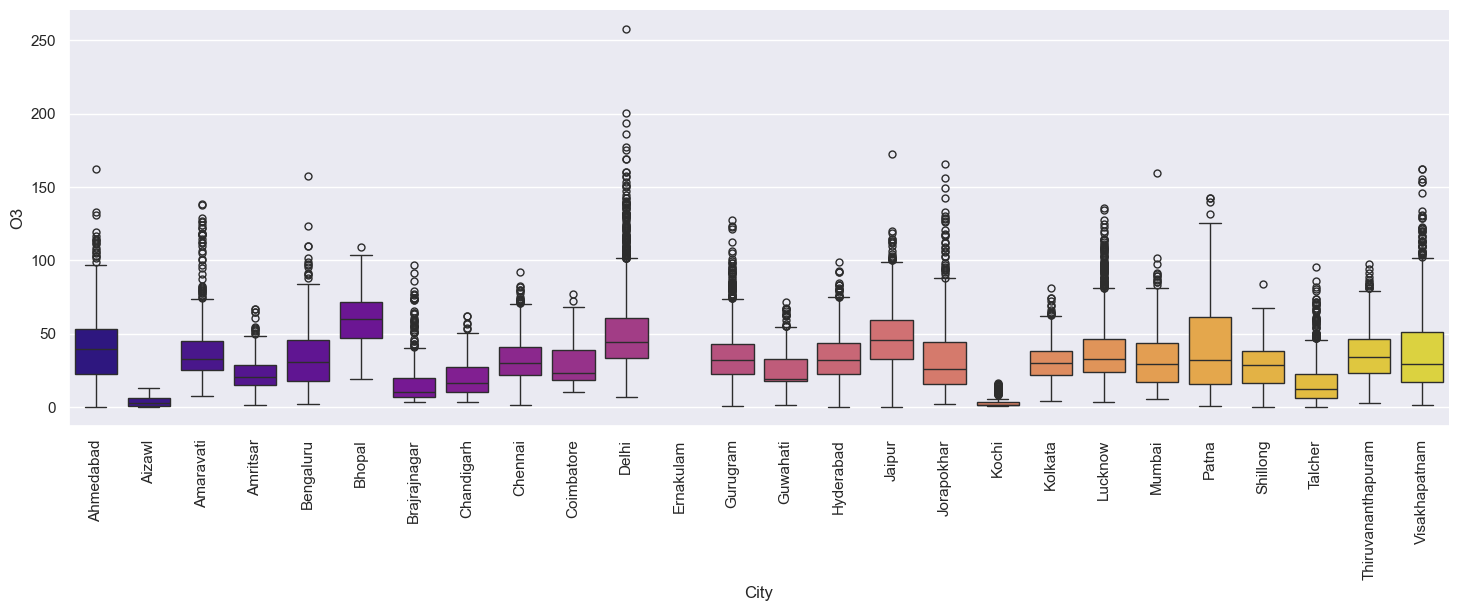

In [150]:
graph3=sns.catplot(x="City",y="O3",data=df,kind="box",height=5,aspect=3, palette="plasma")
graph3.set_xticklabels(rotation=90)

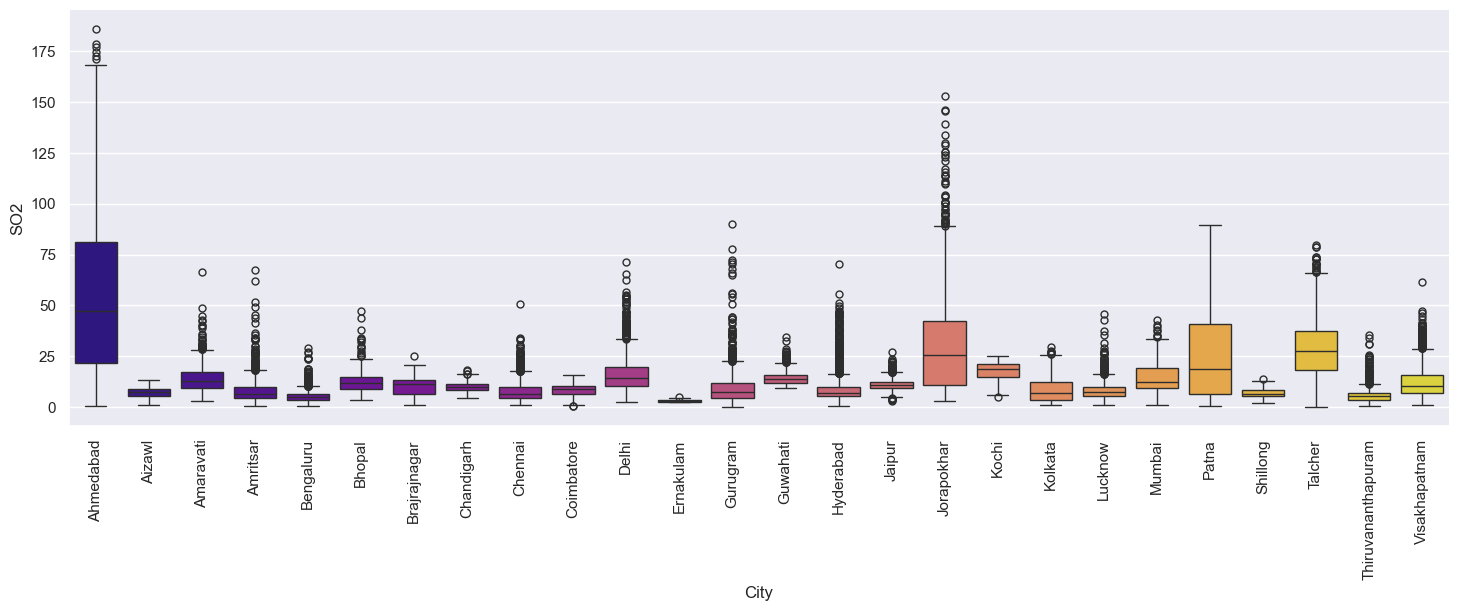

In [148]:
graph4=sns.catplot(x="City",y="SO2",data=df,kind="box",height=5,aspect=3, palette="plasma")
graph4.set_xticklabels(rotation=90)

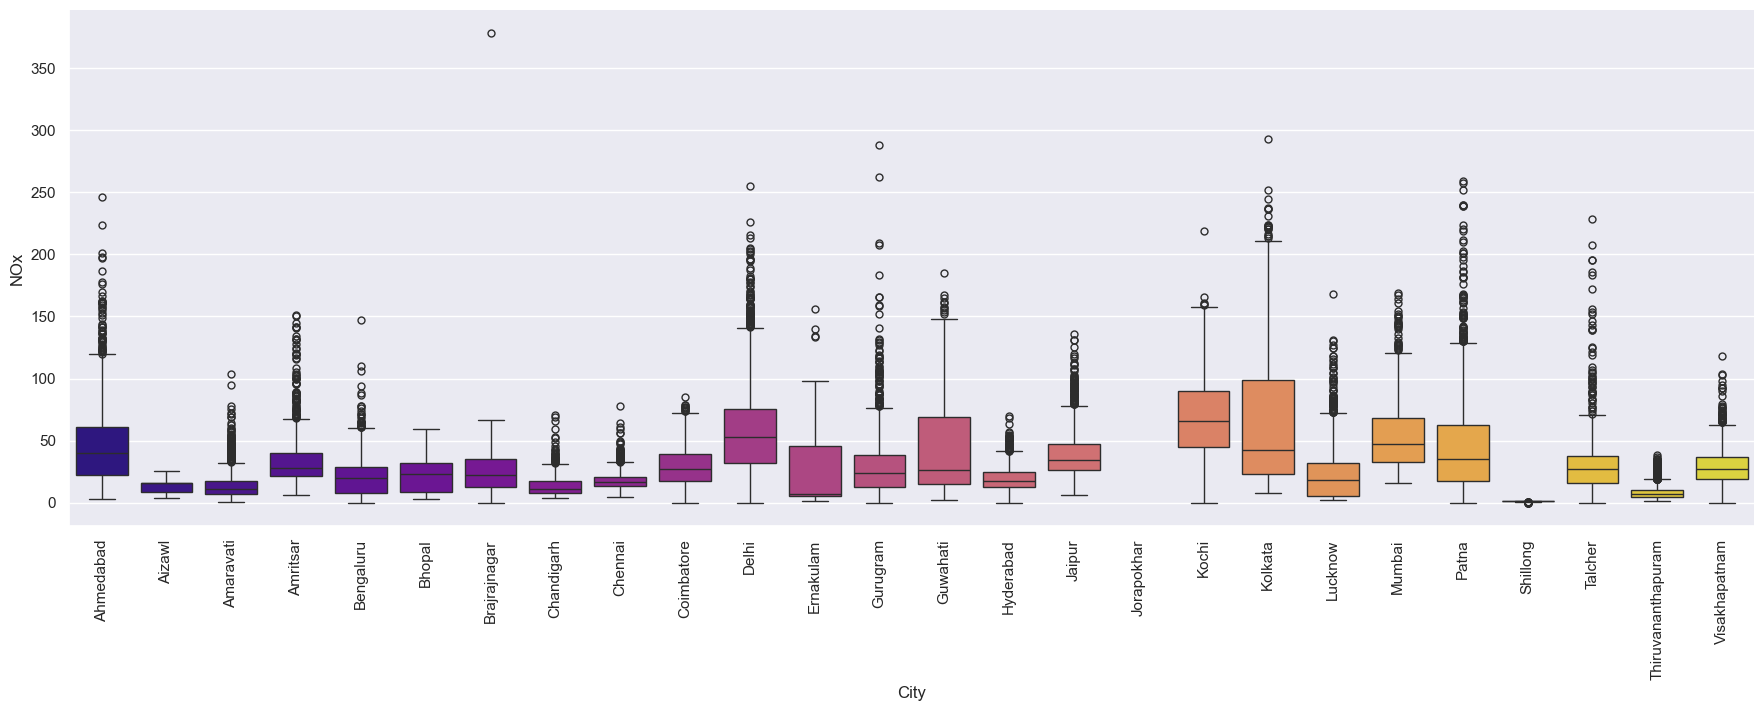

In [144]:
graph5=sns.catplot(data=df,kind="box",x="City",y="NOx",height=6,aspect=3, palette="plasma")
graph5.set_xticklabels(rotation=90)

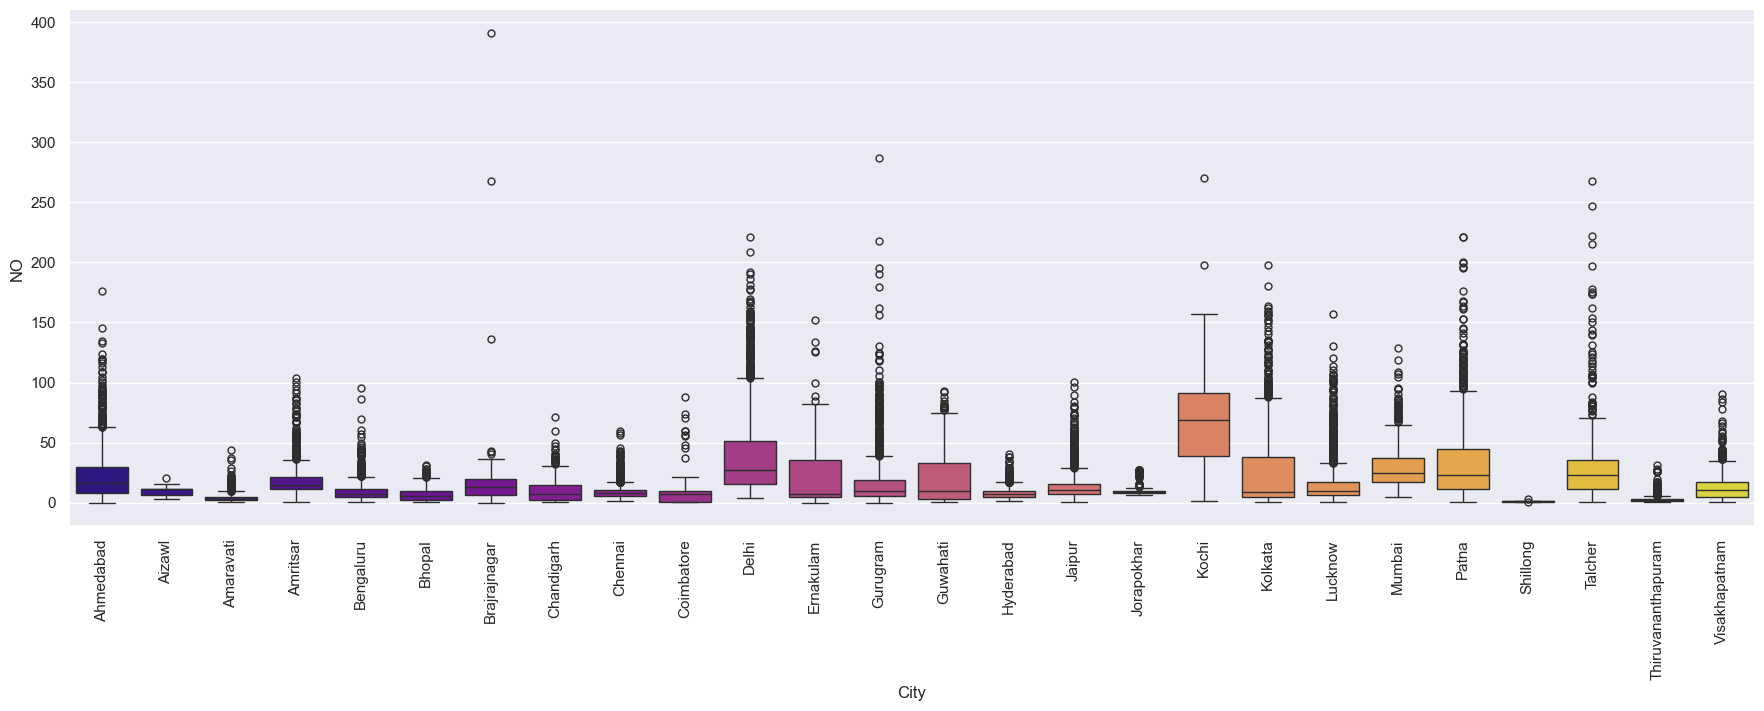

In [146]:
graph6=sns.catplot(data=df,kind="box",x="City",y="NO",height=6,aspect=3, palette="plasma")
graph6.set_xticklabels(rotation=90)

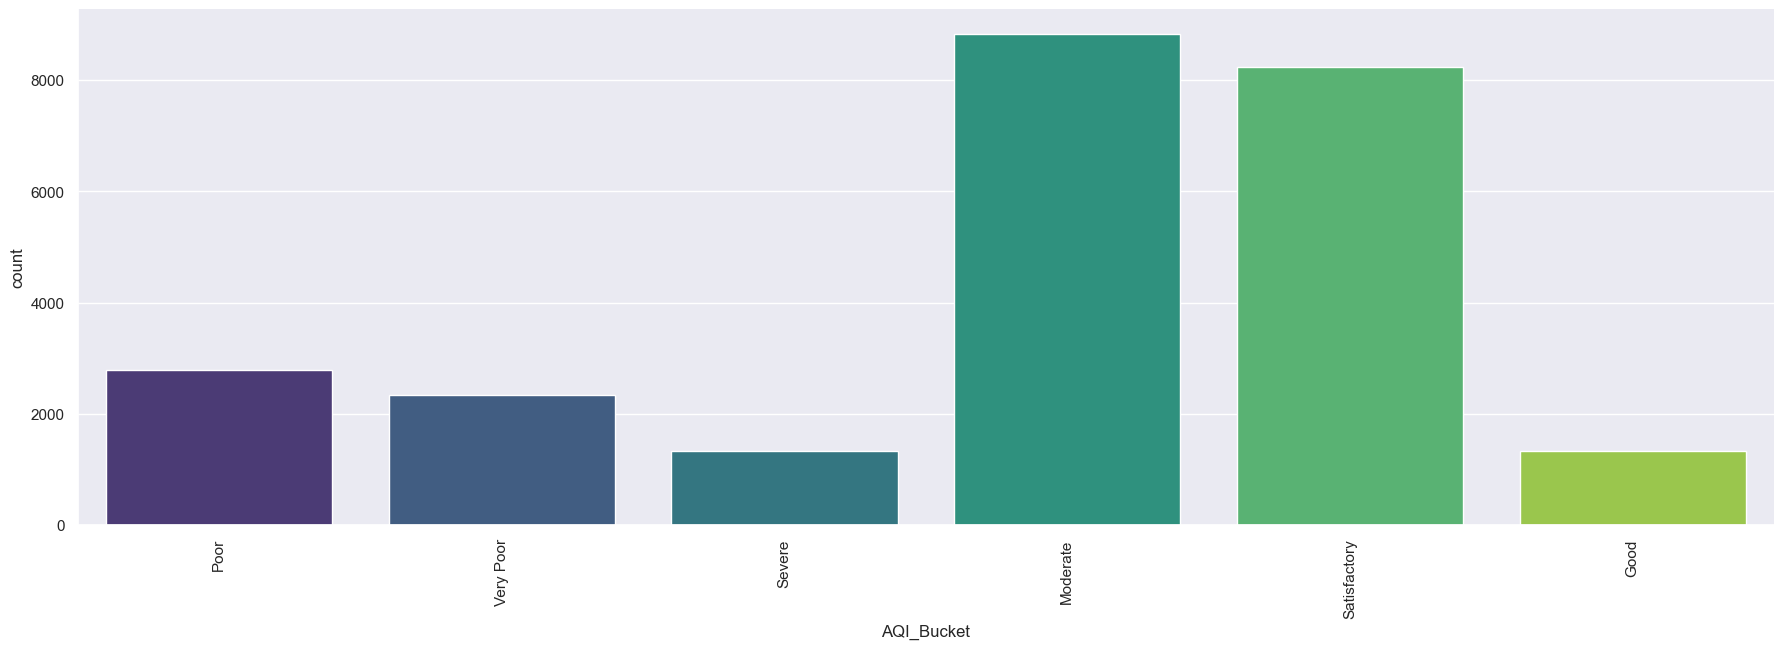

In [140]:
graph7=sns.catplot(x="AQI_Bucket",data=df,kind="count",height=6,aspect=3, palette="viridis")
graph7.set_xticklabels(rotation=90)

In [162]:
# Checking all null values

df.isnull().sum().sort_values(ascending=False)

# higher null values present in PM10 followed by NH3

Xylene        15372
PM10           7086
NH3            6536
Toluene        5826
Benzene        3535
NOx            1857
O3              807
PM2.5           678
SO2             605
CO              445
NO2             391
NO              387
City              0
Date              0
AQI               0
AQI_Bucket        0
dtype: int64

In [164]:
df.describe().loc["mean"]

PM2.5       67.476613
PM10       118.454435
NO          17.622421
NO2         28.978391
NOx         32.289012
NH3         23.848366
CO           2.345267
SO2         14.362933
O3          34.912885
Benzene      3.458668
Toluene      9.525714
Xylene       3.588683
AQI        166.463581
Name: mean, dtype: float64

In [166]:
df = df.replace({

"PM2.5" : {np.nan:67.476613},
"PM10" :{np.nan:118.454435},
"NO": {np.nan:17.622421},
"NO2": {np.nan:28.978391},
"NOx": {np.nan:32.289012},
"NH3": {np.nan:23.848366},
"CO":  {np.nan:2.345267},
"SO2": {np.nan:34.912885},
"O3": {np.nan:38.320547},
"Benzene": {np.nan:3.458668},
"Toluene": {np.nan:9.525714},
"Xylene": {np.nan:3.588683}})


In [169]:
df.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

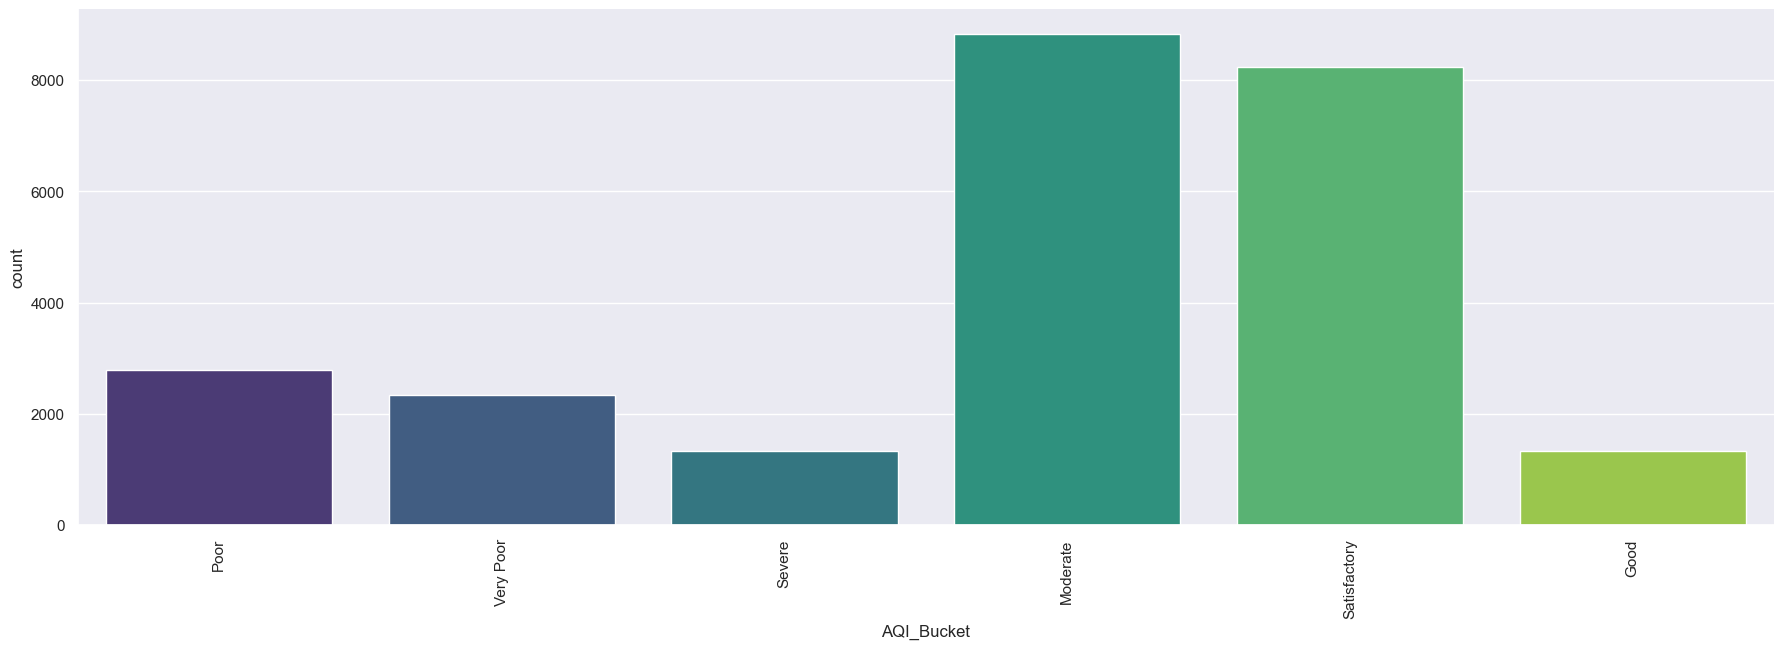

In [173]:
graph=sns.catplot(x="AQI_Bucket",data=df,kind="count",height=6,aspect=3, palette="viridis")
graph.set_xticklabels(rotation=90)

In [175]:
df = df.drop(["AQI_Bucket"], axis=1)

In [177]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
28,Ahmedabad,2015-01-29,83.13,118.454435,6.93,28.71,33.72,23.848366,6.93,49.52,59.76,0.02,0.00,3.14,209.0
29,Ahmedabad,2015-01-30,79.84,118.454435,13.85,28.68,41.08,23.848366,13.85,48.49,97.07,0.04,0.00,4.81,328.0
30,Ahmedabad,2015-01-31,94.52,118.454435,24.39,32.66,52.61,23.848366,24.39,67.39,111.33,0.24,0.01,7.67,514.0
31,Ahmedabad,2015-02-01,135.99,118.454435,43.48,42.08,84.57,23.848366,43.48,75.23,102.70,0.40,0.04,25.87,782.0
32,Ahmedabad,2015-02-02,178.33,118.454435,54.56,35.31,72.80,23.848366,54.56,55.04,107.38,0.46,0.06,35.61,914.0


<Axes: >

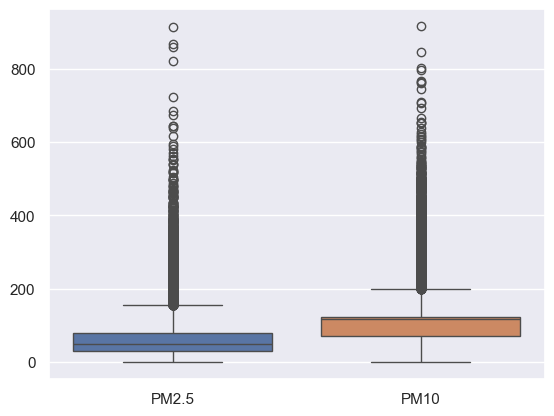

In [179]:
sns.boxplot(data=df[[ 'PM2.5', 'PM10']])

<Axes: >

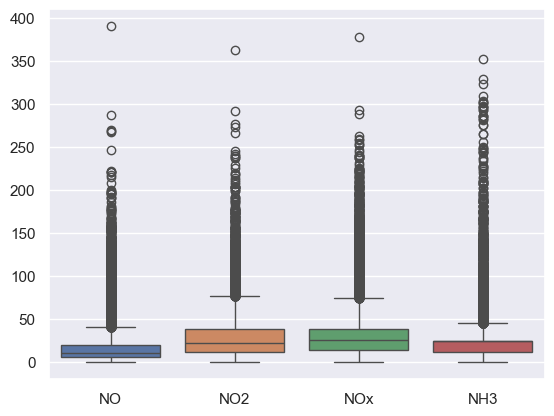

In [181]:
sns.boxplot(data=df[[ 'NO', 'NO2', 'NOx','NH3']]) 

<Axes: >

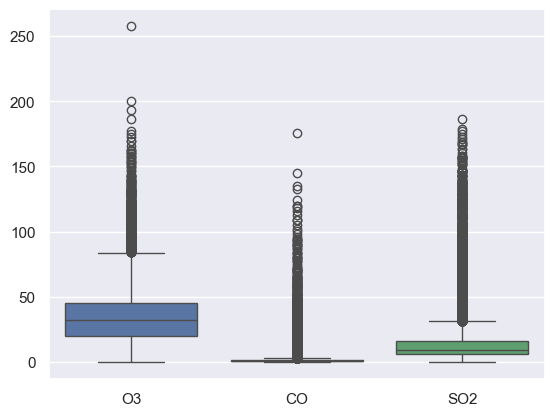

In [183]:
sns.boxplot(data=df[[ 'O3', 'CO', 'SO2']])

<Axes: >

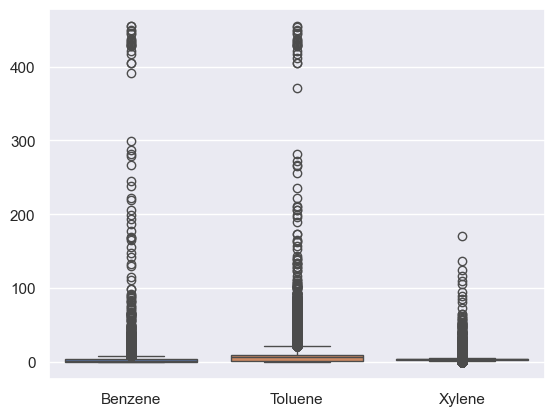

In [185]:
sns.boxplot(data=df[[ 'Benzene', 'Toluene', 'Xylene']])

In [187]:
# This function takes a DataFrame as a parameter and identifies outliers for numeric columns in the DataFrame. 
#It replaces these outliers with the corresponding quartile values ​​(Q1 or Q3). Outliers are identified using the interquartile range (IQR).
def replace_outliers_with_quartiles(df):
    
    for column in df.select_dtypes(include=['number']).columns: # Used to cycle through all numeric columns in the DataFrame.
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        # To identify outliers, lower and upper limits are calculated and values ​​outside these limits are considered outliers.
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # For each column, we identify outliers and replace them with Q1 or Q3. We do this using a lambda function.
        #If the value is less than the lower bound, it is replaced with Q1. If it is greater than the upper bound, 
        #it is replaced with Q3. In the last case, the value is not changed and remains the same.
        df[column] = df[column].apply(
            lambda x: Q1 if x < lower_bound else (Q3 if x > upper_bound else x)
        )
    
    return df 

df = replace_outliers_with_quartiles(df)

In [189]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,24850.0,55.174281,31.829575,0.04,29.56,50.165000,79.505625,154.30
PM10,24850.0,101.351323,39.079916,0.03,71.78,118.454435,122.955625,199.70
NO,24850.0,12.507694,8.762015,0.03,5.72,10.075000,19.710000,40.68
NO2,24850.0,25.901114,16.669494,0.01,12.09,22.535000,37.910000,76.62
NOx,24850.0,26.574513,16.138682,0.00,14.03,25.720000,38.170000,74.38
NH3,24850.0,19.486584,9.630370,0.01,11.28,23.848366,24.710000,44.85
CO,24850.0,1.040507,0.615436,0.00,0.59,0.950000,1.530000,2.94
SO2,24850.0,10.616411,6.091530,0.01,5.79,9.430000,15.940000,31.16
O3,24850.0,33.288444,17.509123,0.01,19.64,32.060000,45.395625,83.99
Benzene,24850.0,2.098520,1.828135,0.00,0.34,1.810000,3.458668,8.13


<Axes: >

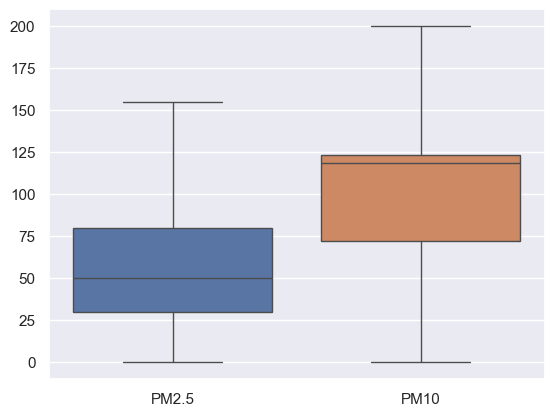

In [191]:
sns.boxplot(data=df[[ 'PM2.5', 'PM10']])

<Axes: >

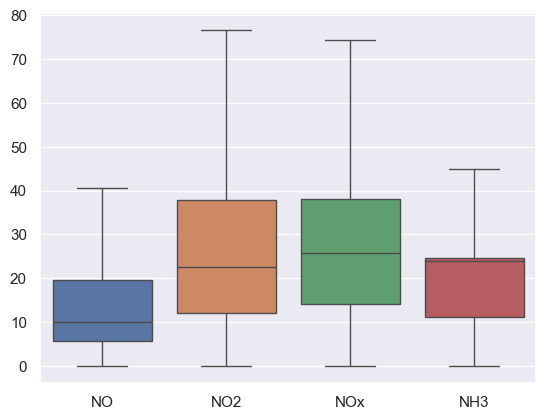

In [193]:
sns.boxplot(data=df[[ 'NO', 'NO2', 'NOx','NH3']])

<Axes: >

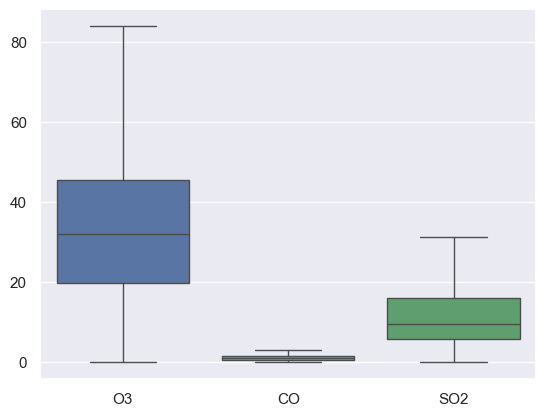

In [195]:
sns.boxplot(data=df[[ 'O3', 'CO', 'SO2']])

<Axes: >

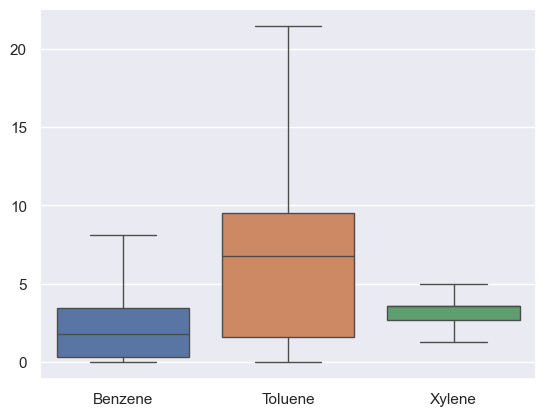

In [197]:
sns.boxplot(data=df[[ 'Benzene', 'Toluene', 'Xylene']])

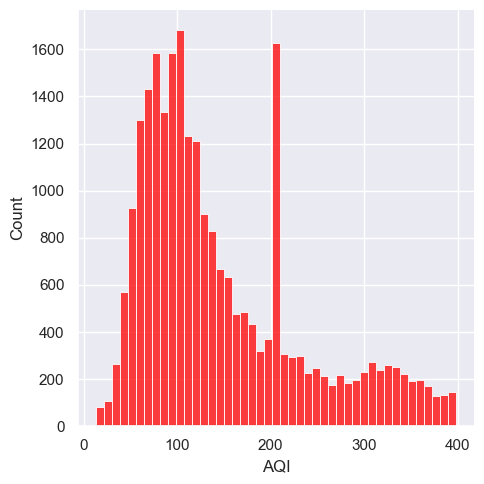

In [210]:
df1=df.drop(columns=['City'])

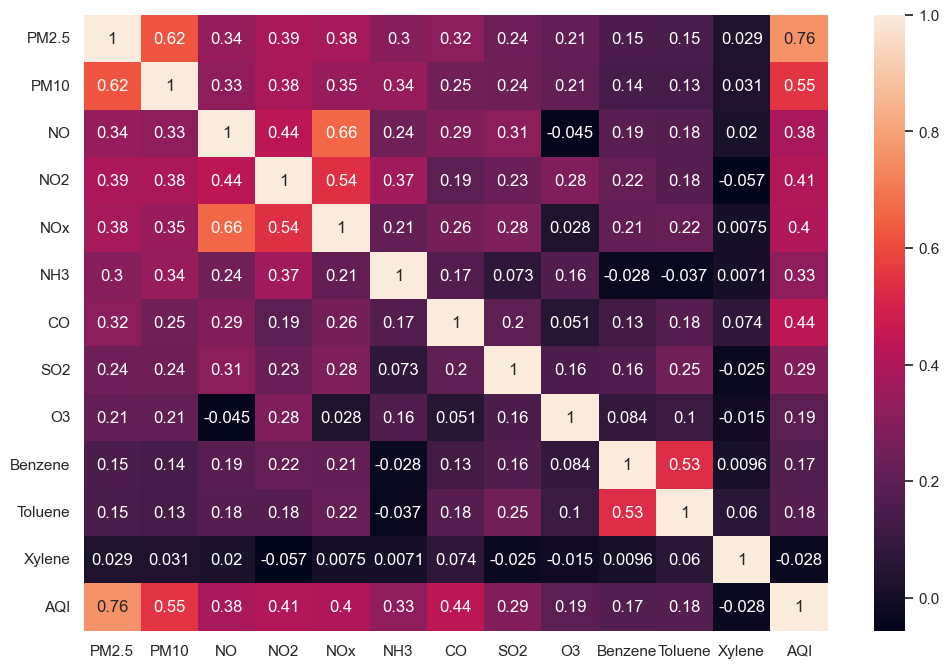

In [240]:
df1_numeric = df1.select_dtypes(include=['number'])

# Compute the correlation matrix
plt.figure(figsize=(12, 8)) 
sns.heatmap(df1_numeric.corr(), annot=True) 
plt.show()

In [252]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Cluster
28,Ahmedabad,2015-01-29,83.1300,118.454435,6.93,28.71,33.72,23.848366,1.53,15.94,59.7600,0.02,0.00,3.140000,209.0,1
29,Ahmedabad,2015-01-30,79.8400,118.454435,13.85,28.68,41.08,23.848366,1.53,15.94,45.3975,0.04,0.00,4.810000,328.0,0
30,Ahmedabad,2015-01-31,94.5200,118.454435,24.39,32.66,52.61,23.848366,1.53,15.94,45.3975,0.24,0.01,3.588683,208.0,0
31,Ahmedabad,2015-02-01,135.9900,118.454435,19.71,42.08,38.17,23.848366,1.53,15.94,45.3975,0.40,0.04,3.588683,208.0,0
32,Ahmedabad,2015-02-02,79.5075,118.454435,19.71,35.31,72.80,23.848366,1.53,15.94,45.3975,0.46,0.06,3.588683,208.0,0


In [254]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Cluster
28,Ahmedabad,2015-01-29,83.1300,118.454435,6.93,28.71,33.72,23.848366,1.53,15.94,59.7600,0.020000,0.000000,3.140000,209.0,1
29,Ahmedabad,2015-01-30,79.8400,118.454435,13.85,28.68,41.08,23.848366,1.53,15.94,45.3975,0.040000,0.000000,4.810000,328.0,0
30,Ahmedabad,2015-01-31,94.5200,118.454435,24.39,32.66,52.61,23.848366,1.53,15.94,45.3975,0.240000,0.010000,3.588683,208.0,0
31,Ahmedabad,2015-02-01,135.9900,118.454435,19.71,42.08,38.17,23.848366,1.53,15.94,45.3975,0.400000,0.040000,3.588683,208.0,0
32,Ahmedabad,2015-02-02,79.5075,118.454435,19.71,35.31,72.80,23.848366,1.53,15.94,45.3975,0.460000,0.060000,3.588683,208.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.0200,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.3000,2.240000,12.070000,2.650000,41.0,2
29527,Visakhapatnam,2020-06-28,24.3800,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.1400,0.740000,2.210000,2.650000,70.0,2
29528,Visakhapatnam,2020-06-29,22.9100,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.9600,0.010000,0.010000,2.650000,68.0,2
29529,Visakhapatnam,2020-06-30,16.6400,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.3000,0.000000,0.000000,2.650000,54.0,2


In [256]:
# Dropping unnecessary columns
df.drop(['Date'],axis=1,inplace=True)        # no need of this feature
df.drop(['City'],axis=1,inplace=True)        # as we are going to calculate based on other parameters not on the loaction so we drop this

In [258]:
df

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Cluster
28,83.1300,118.454435,6.93,28.71,33.72,23.848366,1.53,15.94,59.7600,0.020000,0.000000,3.140000,209.0,1
29,79.8400,118.454435,13.85,28.68,41.08,23.848366,1.53,15.94,45.3975,0.040000,0.000000,4.810000,328.0,0
30,94.5200,118.454435,24.39,32.66,52.61,23.848366,1.53,15.94,45.3975,0.240000,0.010000,3.588683,208.0,0
31,135.9900,118.454435,19.71,42.08,38.17,23.848366,1.53,15.94,45.3975,0.400000,0.040000,3.588683,208.0,0
32,79.5075,118.454435,19.71,35.31,72.80,23.848366,1.53,15.94,45.3975,0.460000,0.060000,3.588683,208.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,15.0200,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.3000,2.240000,12.070000,2.650000,41.0,2
29527,24.3800,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.1400,0.740000,2.210000,2.650000,70.0,2
29528,22.9100,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.9600,0.010000,0.010000,2.650000,68.0,2
29529,16.6400,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.3000,0.000000,0.000000,2.650000,54.0,2


In [260]:
from sklearn.preprocessing import StandardScaler
df1 = StandardScaler().fit_transform(df)

In [262]:
df1

array([[ 0.87831149,  0.43765334, -0.63658947, ..., -0.29450027,
         0.70999757, -0.00440452],
       [ 0.77494642,  0.43765334,  0.15319907, ...,  2.69513707,
         2.07124258, -1.27710562],
       [ 1.23616198,  0.43765334,  1.35614288, ...,  0.50873294,
         0.69855854, -1.27710562],
       ...,
       [-1.01367767, -0.91151782, -1.03376636, ..., -1.17169925,
        -0.90290618,  1.26829658],
       [-1.21066824, -1.31480214, -0.96528759, ..., -1.17169925,
        -1.06305265,  1.26829658],
       [-1.26219369, -0.90460877, -1.3818668 , ...,  0.50873294,
        -1.10880878,  1.26829658]])

In [264]:
df = pd.DataFrame(df1,columns = df.columns)

In [266]:
df

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Cluster
0,0.878311,0.437653,-0.636589,0.168508,0.442764,0.452929,0.795376,0.873951,1.511903,-1.136985,-1.325116,-0.294500,0.709998,-0.004405
1,0.774946,0.437653,0.153199,0.166708,0.898821,0.452929,0.795376,0.873951,0.691599,-1.126045,-1.325116,2.695137,2.071243,-1.277106
2,1.236162,0.437653,1.356143,0.405473,1.613267,0.452929,0.795376,0.873951,0.691599,-1.016642,-1.322987,0.508733,0.698559,-1.277106
3,2.539065,0.437653,0.822008,0.970588,0.718505,0.452929,0.795376,0.873951,0.691599,-0.929119,-1.316598,0.508733,0.698559,-1.277106
4,0.764500,0.437653,0.822008,0.564449,2.864324,0.452929,0.795376,0.873951,0.691599,-0.896298,-1.312339,0.508733,0.698559,-1.277106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24845,-1.261565,-1.289981,-0.550991,-0.050459,-0.435888,-0.728604,-0.927014,-0.339234,-0.570482,0.077392,1.245171,-1.171699,-1.211760,1.268297
24846,-0.967493,-0.697593,-1.037190,0.009532,-0.622400,-0.778447,-0.845770,0.345337,-0.179821,-0.743133,-0.854500,-1.171699,-0.880028,1.268297
24847,-1.013678,-0.911518,-1.033766,0.217701,-0.510864,-0.911363,-0.910766,-0.360575,-0.132987,-1.142455,-1.322987,-1.171699,-0.902906,1.268297
24848,-1.210668,-1.314802,-0.965288,0.201503,-0.481741,-0.981974,-0.845770,-0.127460,-0.284911,-1.147926,-1.325116,-1.171699,-1.063053,1.268297


In [268]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [270]:
# Data Preparation for Modeling
x=df[["PM2.5","PM10","NO","NO2","NOx","NH3","CO","SO2","O3","Benzene","Toluene","Xylene"]]
y=df["AQI"]

In [272]:
x.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
0,0.878311,0.437653,-0.636589,0.168508,0.442764,0.452929,0.795376,0.873951,1.511903,-1.136985,-1.325116,-0.294500
1,0.774946,0.437653,0.153199,0.166708,0.898821,0.452929,0.795376,0.873951,0.691599,-1.126045,-1.325116,2.695137
2,1.236162,0.437653,1.356143,0.405473,1.613267,0.452929,0.795376,0.873951,0.691599,-1.016642,-1.322987,0.508733
3,2.539065,0.437653,0.822008,0.970588,0.718505,0.452929,0.795376,0.873951,0.691599,-0.929119,-1.316598,0.508733
4,0.764500,0.437653,0.822008,0.564449,2.864324,0.452929,0.795376,0.873951,0.691599,-0.896298,-1.312339,0.508733


In [274]:
y.head()

0    0.709998
1    2.071243
2    0.698559
3    0.698559
4    0.698559
Name: AQI, dtype: float64

In [276]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=70)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)
# splitting the data into training and testing data

(19880, 12) (4970, 12) (19880,) (4970,)


In [278]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [280]:
#predicting train
train_pred=model.predict(X_train)
#predicting on test
test_pred=model.predict(X_test)

In [282]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_pred)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',model.score(X_train, Y_train))
print('RSquared value on test:',model.score(X_test, Y_test))

RMSE TrainingData =  0.591234954568313
RMSE TestData =  0.5831772714954147
--------------------------------------------------
RSquared value on train: 0.6513543609598098
RSquared value on test: 0.6562667641934443


In [284]:
KNN = KNeighborsRegressor()
KNN.fit(X_train,Y_train)

KNeighborsRegressor()

In [286]:
#predicting train
train_pred=model.predict(X_train)
#predicting on test
test_pred=model.predict(X_test)

In [288]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_pred)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',model.score(X_train, Y_train))
print('RSquared value on test:',model.score(X_test, Y_test))

RMSE TrainingData =  0.591234954568313
RMSE TestData =  0.5831772714954147
--------------------------------------------------
RSquared value on train: 0.6513543609598098
RSquared value on test: 0.6562667641934443


In [290]:
DT=DecisionTreeRegressor()
DT.fit(X_train,Y_train)

DecisionTreeRegressor()

In [292]:
#predicting train
train_preds=DT.predict(X_train)
#predicting on test
test_preds=DT.predict(X_test)

In [294]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',DT.score(X_train, Y_train))
print('RSquared value on test:',DT.score(X_test, Y_test))

RMSE TrainingData =  0.029944869973786627
RMSE TestData =  0.5373383942840051
--------------------------------------------------
RSquared value on train: 0.9991056471481347
RSquared value on test: 0.7081793009053284


In [296]:
RF=RandomForestRegressor()
RF.fit(X_train,Y_train)

RandomForestRegressor()

In [297]:
#predicting train
train_preds1=RF.predict(X_train)
#predicting on test
test_preds1=RF.predict(X_test)


In [298]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds1)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds1)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',RF.score(X_train, Y_train))
print('RSquared value on test:',RF.score(X_test, Y_test))

RMSE TrainingData =  0.1503986216750925
RMSE TestData =  0.3835220790460379
--------------------------------------------------
RSquared value on train: 0.9774393428704189
RSquared value on test: 0.8513376173418543


In [330]:
# Select only the columns 'CO' and 'AQI'
df_selected = df[['CO', 'AQI']]

# Check if there are any missing values in the selected columns
print(df_selected.isnull().sum())
df_selected.dropna(inplace=True)  # Drop rows with missing values

CO     0
AQI    0
dtype: int64


In [320]:
# Standardize the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_selected)


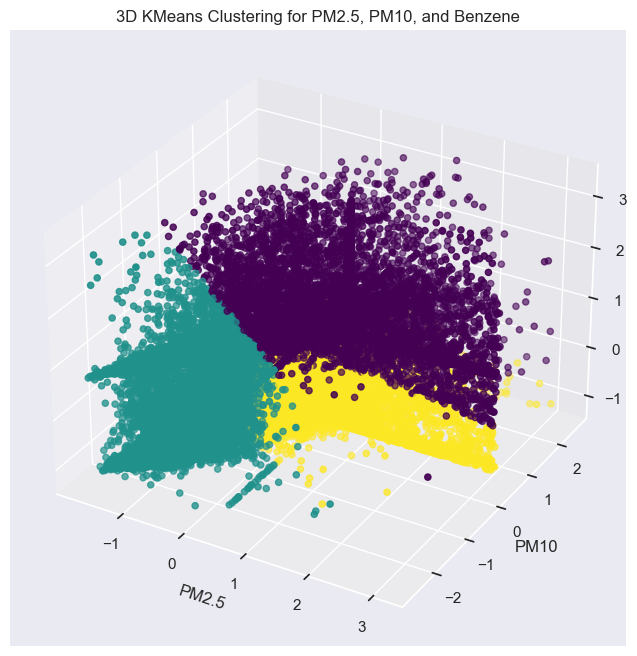

In [326]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(df_selected['PM2.5'], df_selected['PM10'], df_selected['Benzene'], c=df_selected['Cluster'], cmap='viridis')

# Set labels and title
ax.set_title('3D KMeans Clustering for PM2.5, PM10, and Benzene')
ax.set_xlabel('PM2.5')
ax.set_ylabel('PM10')
ax.set_zlabel('Benzene')

# Show the plot
plt.show()
